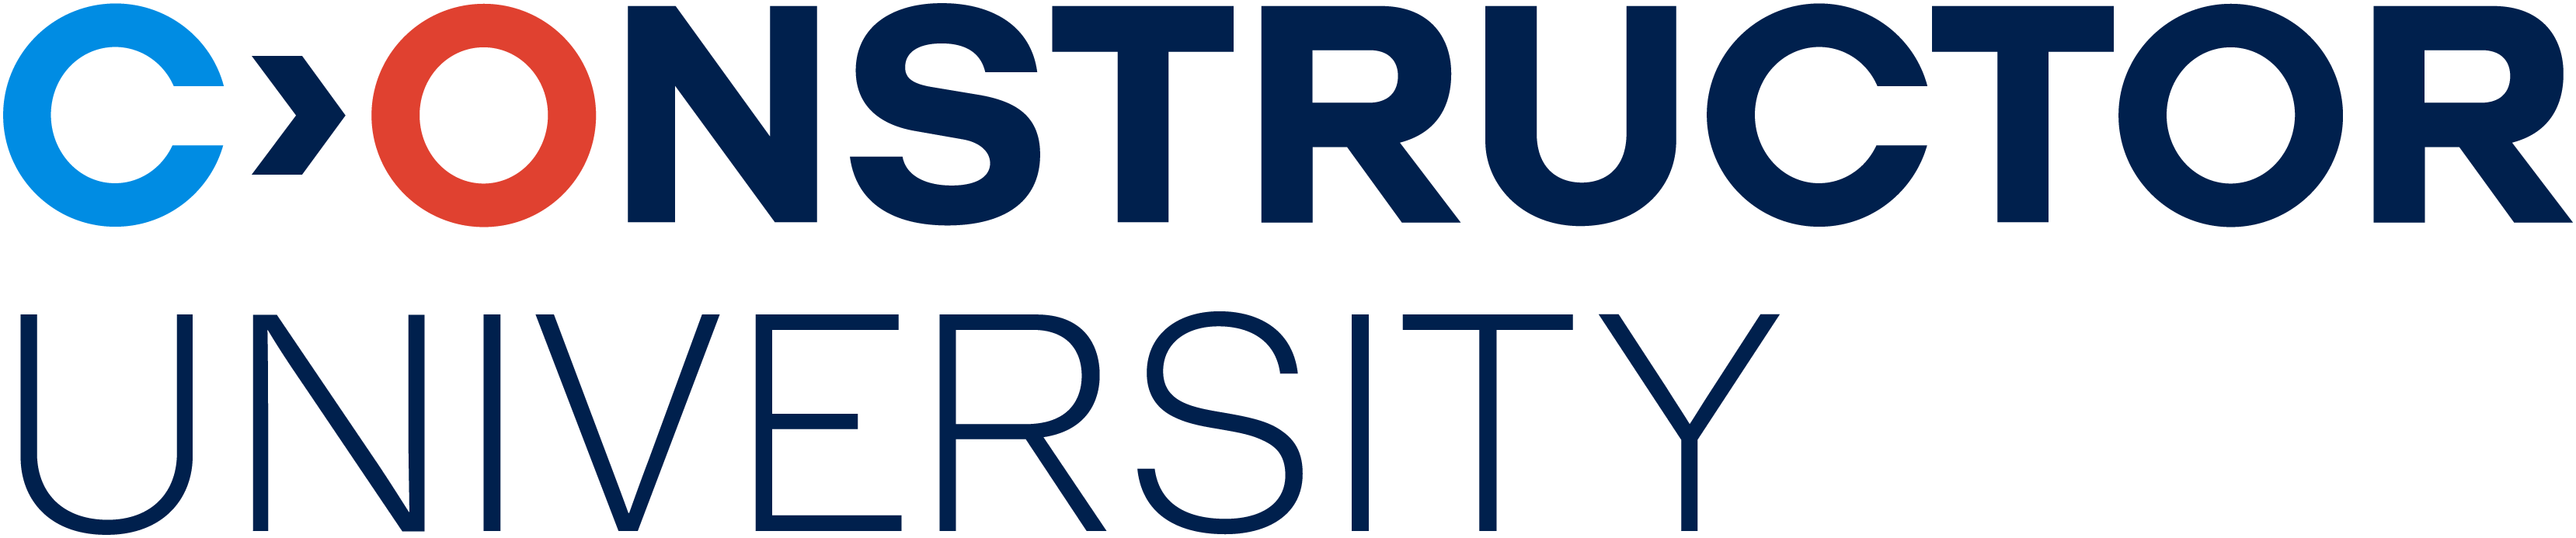
 <div class="col-md-8" markdown="1">
      <h1>Geospatial Big Data Processing with R</h1>
      <h2>by Alina Amanbayeva</h2>
  </div>
  <div class="col-md-4" markdown="1">
  </div>

 This notebook gives a short introduction to the Open Geospatial Consortium (OGC) standard WCS 
(Web Coverage Service) and WCPS (Web Coverage Processing Service). It provides small examples help you to get 
started retrieving data from https://inspire.rasdaman.org/rasdaman/ows which hosts Rasdaman (Multidimensional 
Raster Database Manager) - http://rasdaman.org to process OGC standarized requests from data cubes.

<a id="0"></a> <br>
 # Table of Contents  
1. [OGC WCS Requests](#1)     
    1. [Petascope endpoint](#2)
    1. [GetCapabilities](#3)
    1. [Describe Coverage](#4)
    1. [GetCoverage](#5)
1. [integrating WCS Requests in R](#6)
    1. [Creating an interface in R](#7)
    1. [Checking the connection](#8)
    1. [Disclosing available coverages](#9) 
    1. [Requesting a summary of a selected coverage ID](#10)
    1. [Coverage's axis label](#11)
    1. [Describing the coverage](#12)
    1. [List of coefficients](#13)   
    1. [Time axis domain](#14)
    1. [Get a subset coverage](#15)
1. [OGC Web Coverage Processing Cervices (**WCPS**) Requests](#16)     
1. [Integrating a WCPS query and displaying the results](#17) 
    1. [Slicing, trimming, and downloading a TIFF file](#18)     
    1. [Sending a query, to receive data encoded in CSV format](#19)
1. [Explanation of pixel computations in R](#20)

<a id="1"></a> 
# OGC WCS Requests

**OGC Web Coverage Service** (WCS, http://www.opengeospatial.org/standards/wcs) is a standarized data access protocol used for accessing data. It has three core requests: **GetCapabilities, DescribeCoverage, and GetCoverage**.
<a id="2"></a>
 - **Petascope endpoint** <br> <br>
 It should be used for any OGC requests and the URL for this endpoint is https://inspire.rasdaman.org/rasdaman/ows. <br> <br>
 
To access the Rasdaman demo server, you can use the following URL: https://inspire.rasdaman.org/rasdaman/ows?service=WCS&version=2.0.1&request=.... This URL allows you to specify one of the core requests or the WCS extension. <br>
<a id="3"></a>
 - **GetCapabilities** <br> <br>
 The GetCapabilities request returns an XML-encoded description of service properties and all data (coverages) available on the server. It returns the "Capabilities document," which contains information such as service provider, format encodings, supported interpolation methods, coverages on the server, and more <br> <br>
   <div class="alert alert-block alert-warning">
<b>Example: <br> <br> https://inspire.rasdaman.org/rasdaman/ows?service=WCS&version=2.0.1&request=GetCapabilities <br> <br> </div>
   <a id="4"></a>
 - **Describe Coverage** <br> <br>
 The DescribeCoverage request returns an XML-encoded description of a specific coverage to check axes resolutions, dimensions, and other information. It returns the "Coverage description document" that contains information about spatial and temporal dimensions and general information about the type of coverage. <br> <br>
   <div class="alert alert-block alert-warning">
<b>Example: <br> <br> https://inspire.rasdaman.org/rasdaman/ows?service=WCS&version=2.0.1&request=DescribeCoverage&coverageId=INSPIRE_EL <br> <br> </div>
   <a id="5"></a>
 - **GetCoverage** <br> <br>
 The GetCoverage request returns a full coverage or a subset by spatial/temporal dimensions of the coverage. It allows you to slice and trim the coverage's axes to get a subset coverage. <br> <br>
  <div class="alert alert-block alert-warning">
<b>Example: <br> <br> https://inspire.rasdaman.org/rasdaman/ows?&SERVICE=WCS&VERSION=2.0.1&REQUEST=GetCoverage&COVERAGEID=INSPIRE_OI_IR&SUBSET=E(470642.5,473642.5)&SUBSET=N(4649750,4652750)&FORMAT=image/jpeg <br> <br>  </div>
   

<a id="6"></a>
# How to integrate WCS  requests into an R terminal
You can install required R libraries using install.packages("name_of_package_listed_in_CRAN") function.<br> List of all packages can be found here: https://cran.r-project.org/web/packages/available_packages_by_name.html

To save time I created a package already containing all the packages needed to download. In order to use it run:

In [3]:
#load pre-installed packages needed
install.packages("devtools")
install.packages("remotes")
library(devtools)
remotes::install_github("aamanbayev/CoverageProcessingWithR", dependencies = TRUE)
library(CoverageProcessingR)

<a id="7"></a>
## Creation of an interface in R
In order to operate on a Web Coverage Service, you need to create an interface in R to this WCS.
This is done with the class WCSClient, as follows:

In [4]:
wcs_client <- ows4R::WCSClient$new("https://ows.rasdaman.org/rasdaman/ows", "2.1.0", logger = "INFO")

[ows4R][INFO] OWSGetCapabilities - Fetching https://ows.rasdaman.org/rasdaman/ows?service=WCS&version=2.1.0&request=GetCapabilities 
  |======================================================================| 100%


<a id="8"></a>
## Checking the connection

In [5]:
caps <- tryCatch(
  wcs_client$getCapabilities(),
  error = function(e) {
    message("Error: Could not connect to WCS server.")
    return(NULL)
  }
) #Parse a message in case if it's successful
if (!is.null(caps)) {
    message("Connection to WCS server successful.")
    # Do something with the capabilities
} else {
    message("Connection to WCS server failed.") 
}#Let the user know if connection failed

Connection to WCS server successful.



<a id="9"></a>
## Disclosing all available coverages
Print available coverage IDs taken from the result of GetCoverageSummaries() function

In [7]:
coverage_summaries <- caps$getCoverageSummaries()
coverage_ids <- sapply(coverage_summaries, function(summary) summary$CoverageId)
print(coverage_ids)

 [1] "AverageChloroColor"                                                           
 [2] "AverageChloroColorScaled"                                                     
 [3] "AvgLandTemp"                                                                  
 [4] "AvgTemperatureColor"                                                          
 [5] "AvgTemperatureColorScaled"                                                    
 [6] "Bavaria_50_DSM"                                                               
 [7] "BlueMarbleCov"                                                                
 [8] "Germany_DTM"                                                                  
 [9] "NIR"                                                                          
[10] "NN3_1"                                                                        
[11] "NN3_2"                                                                        
[12] "NN3_3"                                                     

<a id="10"></a>
## Requesting a summary of a chosen by ID coverage
the result is a printed summary

In [8]:
chla <- caps$findCoverageSummaryById("AverageChloroColorScaled", exact = T)
print(chla)

<WCSCoverageSummary>
  Inherits from: <OGCAbstractObject>
  Public:
    attrs: list
    BoundingBox: list
    clone: function (deep = FALSE) 
    CoverageId: AverageChloroColorScaled
    CoverageSubtype: ReferenceableGridCoverage
    CoverageSubtypeParent: NULL
    defaults: list
    element: AbstractObject
    encode: function (addNS = TRUE, geometa_validate = TRUE, geometa_inspire = FALSE, 
    ERROR: function (text) 
    getBoundingBox: function () 
    getClass: function () 
    getClassName: function () 
    getCoverage: function (bbox = NULL, crs = NULL, time = NULL, elevation = NULL, 
    getCoverageStack: function (time = NULL, elevation = NULL, bbox = NULL, filename_handler = NULL, 
    getDescription: function () 
    getDimensions: function () 
    getId: function () 
    getNamespaceDefinition: function (recursive = FALSE) 
    getSubtype: function () 
    getSubtypeParent: function () 
    getWGS84BoundingBox: function () 
    INFO: function (text) 
    initialize: functio

<a id="11"></a>
## Get coverage axis labels with order according to coverage's Coordinate Reference System (CRS)

In [10]:
chla_dims <- chla$getDimensions()
for (dim in chla_dims) {
    print(dim$label)

[ows4R][INFO] WCSDescribeCoverage - Fetching https://ows.rasdaman.org/rasdaman/ows?service=WCS&version=2.1.0&coverageId=AverageChloroColorScaled&request=DescribeCoverage 
  |======================================================================| 100%
[ows4R][INFO] WCSCoverageSummary - Fetching Coverage envelope dimensions by CRS interpretation 
[ows4R][INFO] WCSCoverageSummary - Try to parse CRS from 'http://www.opengis.net/def/crs/OGC/0/AnsiDate' 
[ows4R][INFO] WCSCoverageSummary - Try to parse CRS from 'http://www.opengis.net/def/crs/EPSG/0/4326' 
[1] "ansi"
[1] "Lat"
[1] "Lon"


<a id="12"></a>
## Displaying the result of the describeCoverage function 
which includes grid's upper and lower limits,and offsetvectors in case you would like the result to be  more user friendly getDescription() function can be used

In [14]:
chla_des <- wcs_client$describeCoverage("AverageChloroColorScaled")
print(chla_des) 

[ows4R][INFO] WCSClient - Fetching coverageSummary description for 'AverageChloroColorScaled' ... 
<WCSCoverageDescription>
....|-- boundedBy [srsName=http://crs.rasdaman.com/def/crs-compound?1=http://crs.rasdaman.com/def/crs/OGC/0/AnsiDate&2=http://crs.rasdaman.com/def/crs/EPSG/0/4326,axisLabels=ansi Lat Lon,uomLabels=d degree degree,srsDimension=3] <GMLEnvelope>
........|-- lowerCorner: "2002-07-01T00:00:00.000Z" -90 -180
........|-- upperCorner: "2015-05-01T00:00:00.000Z" 90 180
....|-- domainSet [dimension=3,gmlrgrid:id=AverageChloroColorScaled-grid] <GMLReferenceableGridByVectors>
........|-- limits  <GMLGridEnvelope>
............|-- low  
................|-- value: 0 0 0
............|-- high  
................|-- value: 154 449 899
........|-- axisLabels  
............|-- value: ansi Lat Lon
........|-- origin [gml:id=AverageChloroColorScaled-point,srsName=http://crs.rasdaman.com/def/crs-compound?1=http://crs.rasdaman.com/def/crs/OGC/0/AnsiDate&2=http://crs.rasdaman.com/def/crs/E

<a id="13"></a>
## Get the list of coefficients for irregular axis (time is an irregular axis of this coverage) 

In [8]:
for (dim in chla_dims) {
    if (dim$type == "temporal") {
        print(dim$coefficients)
    }
} 

       [,1]                      
  [1,] "2002-07-01T00:00:00.000Z"
  [2,] "2002-08-01T00:00:00.000Z"
  [3,] "2002-09-01T00:00:00.000Z"
  [4,] "2002-10-01T00:00:00.000Z"
  [5,] "2002-11-01T00:00:00.000Z"
  [6,] "2002-12-01T00:00:00.000Z"
  [7,] "2003-01-01T00:00:00.000Z"
  [8,] "2003-02-01T00:00:00.000Z"
  [9,] "2003-03-01T00:00:00.000Z"
 [10,] "2003-04-01T00:00:00.000Z"
 [11,] "2003-05-01T00:00:00.000Z"
 [12,] "2003-06-01T00:00:00.000Z"
 [13,] "2003-07-01T00:00:00.000Z"
 [14,] "2003-08-01T00:00:00.000Z"
 [15,] "2003-09-01T00:00:00.000Z"
 [16,] "2003-10-01T00:00:00.000Z"
 [17,] "2003-11-01T00:00:00.000Z"
 [18,] "2003-12-01T00:00:00.000Z"
 [19,] "2004-01-01T00:00:00.000Z"
 [20,] "2004-02-01T00:00:00.000Z"
 [21,] "2004-03-01T00:00:00.000Z"
 [22,] "2004-04-01T00:00:00.000Z"
 [23,] "2004-05-01T00:00:00.000Z"
 [24,] "2004-06-01T00:00:00.000Z"
 [25,] "2004-07-01T00:00:00.000Z"
 [26,] "2004-08-01T00:00:00.000Z"
 [27,] "2004-09-01T00:00:00.000Z"
 [28,] "2004-10-01T00:00:00.000Z"
 [29,] "2004-1

<a id="14"></a>
## Get coverage's time axis's domain (as this coverage is 3D with time axis)

In [9]:
temporal_dim <- NULL ## Get coverage's time axis's domain (as this coverage is 3D with time axis)
 for (dim in chla_dims) {
   if (dim$type == "temporal") {
     temporal_dim <- dim
   }
 }
if (!is.null(temporal_dim)) {
   # Get the first and last time coefficients
   time_coefficients <- temporal_dim$coefficients
   first_time <- time_coefficients[1]
   last_time <- time_coefficients[length(time_coefficients)]
 print(paste("First time:", first_time))
   print(paste("Last time:", last_time))
 } else {
   print("No temporal dimension found.")
 }

[1] "First time: 2002-07-01T00:00:00.000Z"
[1] "Last time: 2015-05-01T00:00:00.000Z"


<a id="15"></a>
## Get a subset coverage 
By slicing on time axis, trimming on Lat and Long axes, downloading as TIFF file, and displaying the result directly

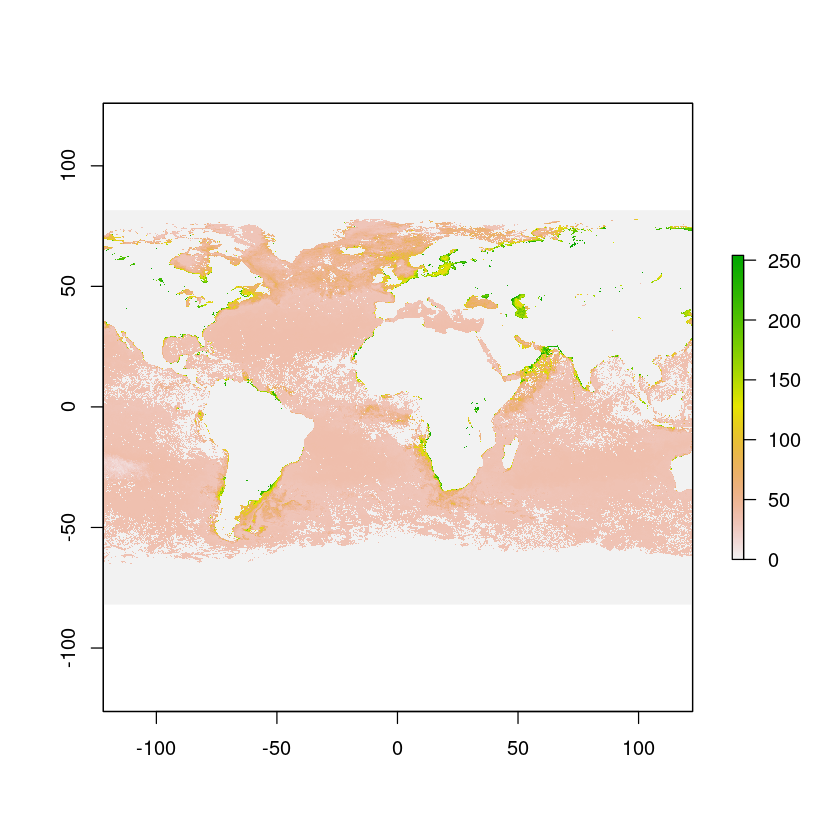

In [28]:
data <- chla$getCoverage(
   bbox = ows4R::OWSUtils$toBBOX(-122.1420, 122.2185 , -81.7242, 81.7825), 
   time = "2002-09-01T00:00:00.000Z",
   filename = "myfile.tif"
 ) # Get a subset coverage by slicing on time axis, trimming on Lat and Long axes, and download as TIFF file
r <- raster::raster(file.path("~", "Downloads", "myfile.tiff")) 
#Note: It was assumed that the file gets downloaded in the Downloads directory
raster::plot(r) # Display result directly


<div class="alert alert-block alert-info"> <b>Tip:</b> There is also an option to download multiple coverages in a stack, by slightly changing a previous function, the way as in the cell below:  </div>

In [24]:
cov_stack <- chla$getCoverageStack(
  bbox = ows4R::OWSUtils$toBBOX(-122.1420,122.2185 , -81.7242, 81.7825), 
  time = tail(chla_dims[[1]]$coefficients, 5),
  filename_handler = WCSCoverageFilenameHandler
) #Load stack of subset coverages

[ows4R][INFO] WCSCoverageSummary - Fetching coverage stack with 'temporal' dimension 
[ows4R][INFO] WCSCoverageSummary - 2015-01-01T00:00:00.000Z 
[ows4R][WARN] WCSCoverageSummary - Coverage without vertical dimension: 'elevation' argument is ignored 
<GMLEnvelope>
....|-- lowerCorner: "2002-07-01T00:00:00.000Z" -81.7242 -122.142
....|-- upperCorner: "2015-05-01T00:00:00.000Z" 81.7825 122.2185[ows4R][INFO] WCSGetCoverage - Fetching https://ows.rasdaman.org/rasdaman/ows?service=WCS&version=2.1.0&coverageId=AverageChloroColorScaled&subset=ansi(%222015-01-01T00:00:00.000Z%22)&subset=Lat(-81.7242,81.7825)&subset=Lon(-122.142,122.2185)&format=image/tiff&request=GetCoverage 
Downloading: 760 kB     [ows4R][INFO] WCSCoverageSummary - 2015-02-01T00:00:00.000Z 
[ows4R][WARN] WCSCoverageSummary - Coverage without vertical dimension: 'elevation' argument is ignored 
<GMLEnvelope>
....|-- lowerCorner: "2002-07-01T00:00:00.000Z" -81.7242 -122.142
....|-- upperCorner: "2015-05-01T00:00:00.000Z" 81.7


<a id="16"></a>
# OGC Web Coverage Processing Cervices (**WCPS**) Requests

The OGC Web Coverage Processing Service (WCPS) is an extension of the OGC WCS standard that allows for the extraction, analysis, and processing of multi-dimensional coverages. WCPS is designed with syntax similar to the XQuery language, and it establishes a protocol for sending a query string to a server and receiving a set of coverages as the result of the server's processing.

The processing expression is applied to each coverage specified in the given list (coverageList) that satisfies the optional boolean expression. The query references each coverage using the corresponding identifier variableName in the processing expression. The processing expression can include sub-expressions that return scalars or encoded marrays, which operate on both the data and metadata of a coverage. More information can be found at http://tutorial.rasdaman.org/rasdaman-and-ogc-ws-tutorial/#ogc-web-services-web-coverage-processing-service.

To execute a query, use the following request (ProcessCoverages is an extension of the WCS request):

https://inspire.rasdaman.org/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=

The query parameter should contain a WCPS query with valid syntax for the server to process. An example of subsetting a 3D coverage to a 2D coverage and encoding the result in image/png is provided in the previous demo for the WCS GetCoverage request.


In [ ]:
# NOTE: for GET requests, WCPS query cannot contain new lines character (below query is just for brevity)
for $c in (AvgTemperatureColorScaled) return encode(
      $c[Lat(-81.7242:81.7825), 
         Lon(-122.1420:122.2185), 
         ansi("2002-09-01T00:00:00.000Z")], 
      "png")

**WCPS** provides the capability for significantly more intricate processing requests than what can be achieved with WCS. For instance, it allows for time-series processing to determine the difference between two specific date-time slices ("2002-09-01T00:00:00.000Z" (reference) and "2009-05-01T00:00:00.000Z") of the coverage AvgTemperatureColorScaled.

 <div class="alert alert-block alert-info"> <b>**NOTE:**</b> It should be noted that when using WCPS queries that contain special characters such as '[', ']', '{', '}', it is necessary to use POST requests. </div>


Some of the libraries used are not available in CRAN R packages, have been found on GitHub, such as myCubeR (https://github.com/ARPASMR/myCubeR, and have been installed using devtools package's "install_github()" function. 

<a id="17"></a>
# Integrating a WCPS query and displaying the results

<a id="18"></a>
## Slicing, trimming, and downloading a TIFF file

myCubeR::WPCS_query() function send a query to a server, and receives the results. The variables needed are the query itself, format, name of the file where we put the retreived data, and URL to which the query is sent. In fact you can send any type of an executable query.

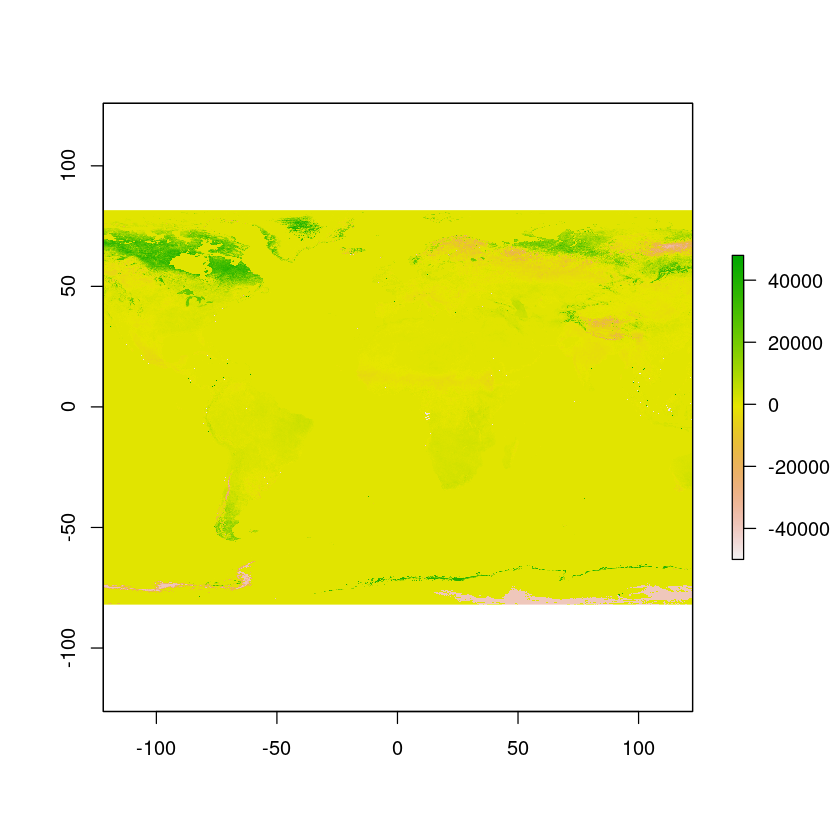

In [22]:
query='for $c in (AvgTemperatureColorScaled) return encode( 
 ($c[Lat(-81.7242:81.7825), Lon(-122.1420:122.2185), ansi("2002-09-01T00:00:00.000Z")]
 - $c[Lat(-81.7242:81.7825), Lon(-122.1420:122.2185), ansi("2009-05-01T00:00:00.000Z")])
 * 200, "tiff")' # Query for a TIFF format 
raster_tot=myCubeR::WPCS_query(proper_query=query, FORMAT="image/tiff", filename="AvgTemperatureColorScaled.tiff", query_url="https://inspire.rasdaman.org/rasdaman/ows")
# Send a WCPS query with special characters to server and download the result 
file_path <- file.path("~", "Downloads", "AvgTemperatureColorScaled.tiff")
ra <- raster::raster(file_path)
#Note: It was assumed that the file gets downloaded in the Downloads directory
raster::plot(ra)
# Display a TIFF file directly

<div class="alert alert-block alert-info"> <b>Tip:</b> The data can also be downloaded and displayed in a PNG or JPEG formats. Here we display the same query with a PNG encoding </div>


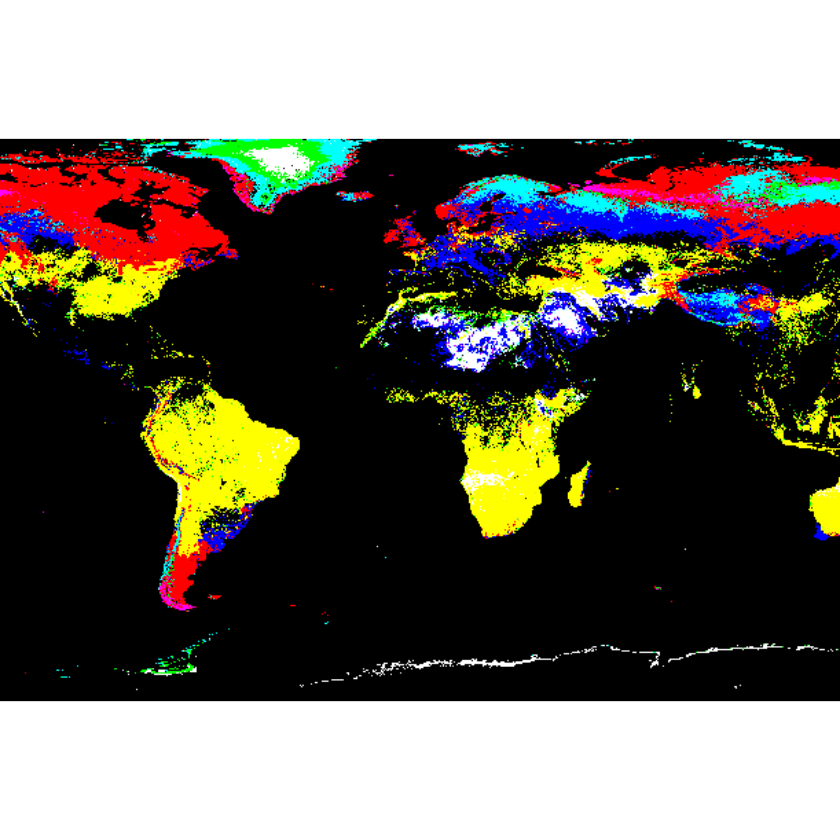

In [18]:
query='for $c in (AvgTemperatureColorScaled) return encode( 
 ($c[Lat(-81.7242:81.7825), Lon(-122.1420:122.2185), ansi("2002-09-01T00:00:00.000Z")]
 - $c[Lat(-81.7242:81.7825), Lon(-122.1420:122.2185), ansi("2009-05-01T00:00:00.000Z")])
 * 200, "png")' 
raster_top=myCubeR::WPCS_query(proper_query=query, FORMAT="image/png", filename="AvgTemperatureColorScaled.png", query_url="https://inspire.rasdaman.org/rasdaman/ows")
# Send a WCPS query with special characters to server and download the result
file_path = file.path("~", "Downloads", "AvgTemperatureColorScaled.png")
img <- png::readPNG(file_path)
#Note: It was assumed that the file gets downloaded in the Downloads directory
grid::grid.raster(img) 

<a id="19"></a>
## Sending a query, to receive data encoded in CSV format
The last query sent by this vignette to show, that the data can be further displayed after converting it to a JSON format. Any one in interest may change the queries and its parameters to receive different results.

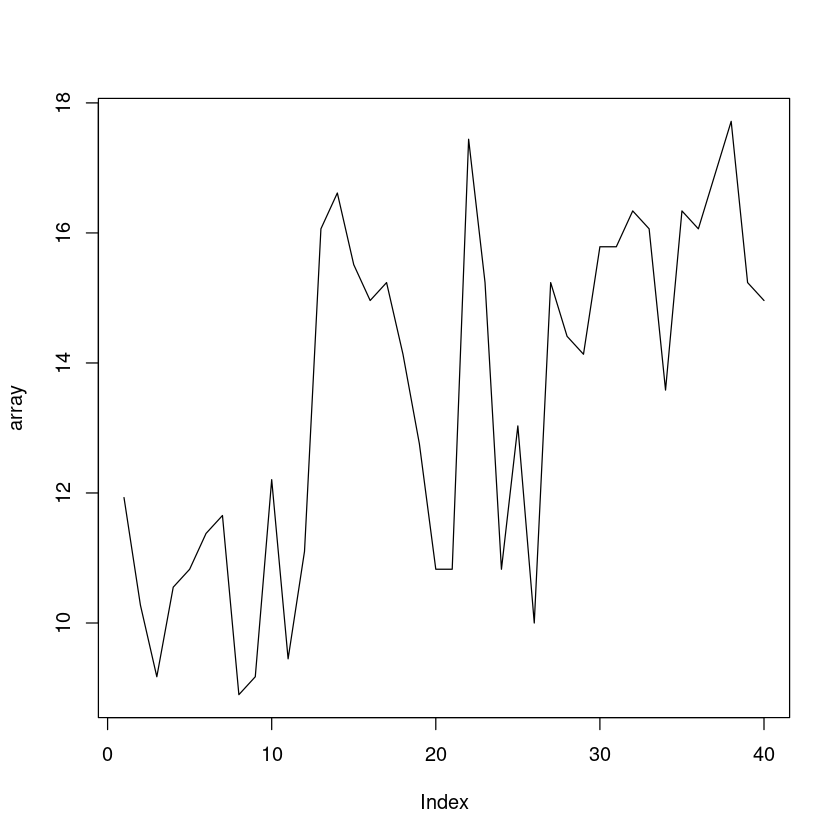

In [27]:
queryplot='for $c in (AvgLandTemp) return encode( 
                 $c[Lat(41.7242:45.7352), 
                 Long(12.1420), 
                 ansi("2000-02-01T00:00:00.000Z")]
            , "text/csv")'
# Select a 1D subset coverage result encoded in JSON
raster_toj=myCubeR::WPCS_query(proper_query=queryplot, FORMAT="text/csv", filename="AvgLandTemp.csv", query_url="https://inspire.rasdaman.org/rasdaman/ows")
df <- read.csv(file.path("~", "Downloads", "AvgLandTemp.csv"))
json_string <- jsonlite::toJSON(df)
write(json_string, file.path("~", "Downloads", "AvgLandTemp.json"))
# Send the query and download the result
file_path = file.path("~", "Downloads", "AvgLandTemp.json")
json_data <- jsonlite::read_json(file_path)
#Note: It was assumed that the file gets downloaded in the Downloads directory
array <- as.numeric(json_data)

# Display the raw values of 1D array in a plot
raster::plot(array, type = "l")

<a id="20"></a>
# Explanation of pixel computations in R

The query language enables us to process data inside it, as we can trim and slice subsets, by choosing the timestamps, coordinates, and bands. Although the functionality of the R language also gives us an opportunity for further processing, as for example displayed in a previous cell. Now we will explain the processes taking part in these computations. <br> <br>
  Lets start from basics, e.g., how we send the queries to a server: 
 <div class="alert alert-block alert-warning">
<b>  query_encode  <- urltools::url_encode(proper_query) <br>
  request<- paste(query_url, query_encode, collapse = NULL, sep="")<br> 
  res <- GET(request) </div>
 <br> <br>
    url_encode() function works by replacing each character in the input string with its corresponding hexadecimal representation, preceded by a percent sign (%). The hexadecimal representation of a character is a two-digit code that represents the ASCII code for that character. <br> <br>
    paste(query_url, query_encode, collapse = NULL, sep="") takes one or more vectors of strings and combines them into a single string, optionally separated by a specified separator.<br> <br>
    GET(request) function sends an HTTP GET request to the specified URL, and the server responds with the requested data. The function waits for the response and returns the result as an R object. The response body is the data that was requested from the server, and it can be in various formats such as JSON, XML, or text. <br> <br> <br>
    Now let's observe how we save the response: 
 <div class="alert alert-block alert-warning">
<b>  out<- content(res, response_format) <br>
		if (is.null(filename)) {<br>
			return(out)<br>
		} else {<br>
			# Save to local disk <br>
			savefile(response=res, filename=filename)<br>
		} </div> 
 <br> <br>
     The content() function extracts the content of the HTTP response object res and returns it in the specified format. If filename is not specified, the function simply returns the content in the desired format. <br> <br>
     If filename is specified, the content is saved to a local file with the specified name using the savefile() function. The savefile() function takes two arguments: response, which is the content to be saved, and filename, which is the name of the file to which the content should be saved. <br> <br> <br> 
     Now let's dive in to details of the processing of the retrieved data.
    <div class="alert alert-block alert-warning">
<b>  df <- read.csv(file.path("~", "Downloads", "AvgLandTemp.csv"))<br>
json_string <- jsonlite::toJSON(df) <br>
write(json_string, file.path("~", "Downloads", "AvgLandTemp.json")) <br>
json_data <- jsonlite::read_json(file.path("~", "Downloads", "AvgLandTemp.json")) <br>
array <- as.numeric(json_data)<br>
raster::plot(array, type = "l")</div> 
 <br> <br>
        The read.csv() function is called with a file path or connection argument.The function then creates a connection to the file.The first line of the file is read to determine the column names and data types.
The function then reads the remaining lines of the file, storing them in memory as a list.
The list is then converted into a data frame.If the header argument is set to TRUE, the first row of the file is treated as the column names for the data frame.
If the row.names argument is set to TRUE, the first column of the file is treated as the row names for the data frame.If the file contains missing values, the na.strings argument can be used to specify how missing values are represented in the file.Finally, the data frame is returned. <br> <br>
        The computational steps that **jsonlite::toJSON()** performs: The function first checks the class of the input object to determine how to serialize it. If the object is a data frame or a list, it is serialized as a JSON object. If the object is a vector or an array, it is serialized as a JSON array.
The function then iterates over the input object's elements, converting each element to its JSON representation. For example, a numeric value is converted to a JSON number, a character string is converted to a JSON string, and so on.If the input object contains nested elements (such as a list of lists), the function recursively calls itself on each nested element to serialize it.The function then assembles the JSON string by concatenating the JSON representations of the input object's elements together with appropriate separators (e.g., commas between elements).

Finally, the function returns the JSON string. <br> <br>
        **write()** is a function that writes data to a file. It takes two arguments: the first argument is the data to be written, and the second argument is the file name or connection where the data will be written. If the file already exists, it will be overwritten. For example, write("hello", "myfile.txt") will create a new file called "myfile.txt" in the current working directory, and write the string "hello" to that file. <br> <br>

   Here is how **read_json()** function works computationally:The input to read_json() can either be a file path or a JSON string. If a file path is provided, the function reads the JSON data from the file using the readLines() function and stores it as a character vector. If a JSON string is provided, it is directly stored as a character vector.The character vector obtained from step 1 is parsed by the jsonlite package using the fromJSON() function. This function converts the JSON string to an R object.The R object is returned as the output of read_json(). The type of the R object depends on the structure of the JSON data. For example, if the JSON data represents an array, the R object will be a list. If the JSON data represents a JSON object, the R object will be a named list. <br>In our example the rsult will be:
     

In [ ]:
 <b> X..DOCTYPE.HTML.PUBLIC....IETF..DTD.HTML.2.0..EN. <br>
1                                                                      <html><head> 
2                                                      <title>404 Not Found</title> 
3                                                                     </head><body> 
4                                                                <h1>Not Found</h1> 
5                            <p>The requested URL was not found on this server.</p> 
6                                                                              <hr> 
7 <address>Apache/2.4.52 (Ubuntu) Server at inspire.rasdaman.org Port 443</address> 
8                                                                    </body></html>  


        


           [1] NA NA NA NA NA NA NA NA,
        

Then when we convert the result into JSON, it gives us:

In [ ]:
[{"X..DOCTYPE.HTML.PUBLIC....IETF..DTD.HTML.2.0..EN.":"<html><head>"},
        {"X..DOCTYPE.HTML.PUBLIC....IETF..DTD.HTML.2.0..EN.":"<title>404 Not Found<\/title>"},
        {"X..DOCTYPE.HTML.PUBLIC....IETF..DTD.HTML.2.0..EN.":"<\/head><body>"},\
        {"X..DOCTYPE.HTML.PUBLIC....IETF..DTD.HTML.2.0..EN.":"<h1>Not Found<\/h1>"},
        {"X..DOCTYPE.HTML.PUBLIC....IETF..DTD.HTML.2.0..EN.":"<p>The requested URL was not found on this server.<\/p>"},
        {"X..DOCTYPE.HTML.PUBLIC....IETF..DTD.HTML.2.0..EN.":"<hr>"},
        {"X..DOCTYPE.HTML.PUBLIC....IETF..DTD.HTML.2.0..EN.":"<address>Apache/2.4.52 (Ubuntu) Server at <br>inspire.rasdaman.org Port 443<\/address>"},
        {"X..DOCTYPE.HTML.PUBLIC....IETF..DTD.HTML.2.0..EN.":"<\/body><br><\/html>"}] 
           

When we apply as.numeric() function on our data, we receive:
<div class="alert alert-block alert-warning">
[1] NA NA NA NA NA NA NA NA </div> 

Which is basically a converted input object to a numeric data type, using the following rules:<br><br>

If the input object is a character string that contains only digits and optional signs (+/-) and decimal points, then the function converts it to a numeric value.<br>

If the input object is a logical value (TRUE or FALSE), then the function converts it to 1 (TRUE) or 0 (FALSE).<br>

If the input object is a factor or a character string that does not contain only digits and optional signs (+/-) and decimal points, then the function throws an error.<br>

If the input object is already numeric, then the function returns the input object as is.<br>

If the input object is missing (NA), then the function returns NA.<br><br>
        
Finally, we apply **plot()** function on the array we have and receive the final graph. The function is a part of the R package "raster". It creates a line plot with the values of the numeric array on the y-axis and the index of the values on the x-axis. The type = "l" argument is used to specify that a line plot should be created. <br> <br> 
        
   **Overall R gives a vast range of possibilities for Geospatial Data Processing, as shown above in the previous exapmle. Using the functionality of R, given existing functions, incuding mentioned functions, any user can advance in the further processing.**